In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import json
import glob
import os

In [2]:
base = "../exp/"
paths = glob.glob(base + "rphast/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
queries = pd.DataFrame.from_records([{
    **algo,
    'experiment': exp['experiment'],
    'target_set_size_exp': exp['target_set_size_exp'],
    'ball_size_exp': exp['ball_size_exp'],
    'graph': { 'europe': 'DIMACs Europe', 'osm_ger': 'OSM Germany', 'osm_europe': 'OSM Europe' }[[x for x in run['args'][1].split('/') if x != ''][-1]],
    }
    for run in data for exp in run['experiments'] for algo in exp['algo_runs']])

In [4]:
queries['running_time_s'] = queries['running_time_ms'] / 1000.0
queries['selection_running_time_s'] = queries['selection_running_time_ms'] / 1000.0

In [5]:
queries['query_running_time_ms'] = queries['running_time_ms'] - queries['selection_running_time_ms']

In [6]:
queries.loc[lambda x: x['algo'] != 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 14] \
    .groupby(['ball_size_exp', 'graph', 'algo'])['running_time_ms'].mean().reset_index()

,ball_size_exp,graph,algo,running_time_ms
0,14,DIMACs Europe,lazy_rphast_cch_many_to_one,1.00
1,14,DIMACs Europe,lazy_rphast_many_to_one,0.96
2,14,OSM Germany,lazy_rphast_cch_many_to_one,1.01
3,14,OSM Germany,lazy_rphast_many_to_one,1.08
4,15,DIMACs Europe,lazy_rphast_cch_many_to_one,1.38
5,15,DIMACs Europe,lazy_rphast_many_to_one,1.37
6,15,OSM Germany,lazy_rphast_cch_many_to_one,1.34
7,15,OSM Germany,lazy_rphast_many_to_one,1.43
8,16,DIMACs Europe,lazy_rphast_cch_many_to_one,1.84
9,16,DIMACs Europe,lazy_rphast_many_to_one,1.83


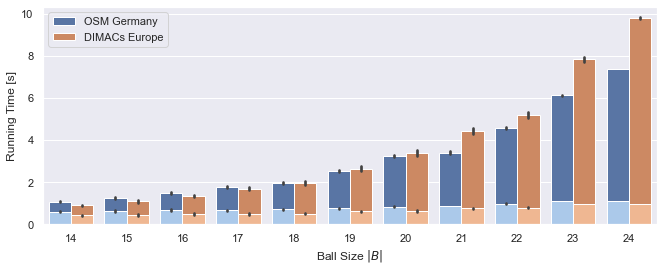

In [7]:
plt.figure(figsize=(11,4))
g = sns.barplot(data=queries
                 .loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many']
                 .loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_s', hue='graph')
g = sns.barplot(data=queries
                 .loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many']
                 .loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='selection_running_time_s', hue='graph', palette=sns.color_palette("pastel"))
g.set_xlabel('Ball Size $|B|$')
g.set_ylabel('Running Time [s]')
handles, labels = g.get_legend_handles_labels()
g.legend(handles[0:2], labels[0:2])

Text(0, 0.5, 'Running Time [ms]')

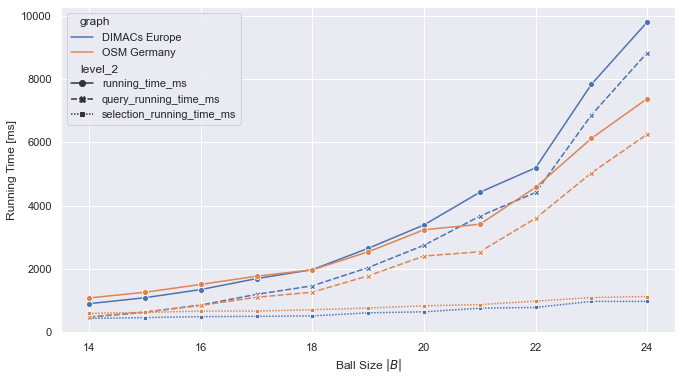

In [8]:
plt.figure(figsize=(11,6))
g = sns.lineplot(data=queries
                 .loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many']
                 .loc[lambda x: x['target_set_size_exp'] == 14]
                 .groupby(['ball_size_exp', 'graph'])[['running_time_ms', 'query_running_time_ms', 'selection_running_time_ms']].mean()
                 .stack().reset_index(), x='ball_size_exp', y=0, hue='graph', style='level_2', markers=True)
g.set_xlabel('Ball Size $|B|$')
g.set_ylabel('Running Time [ms]')

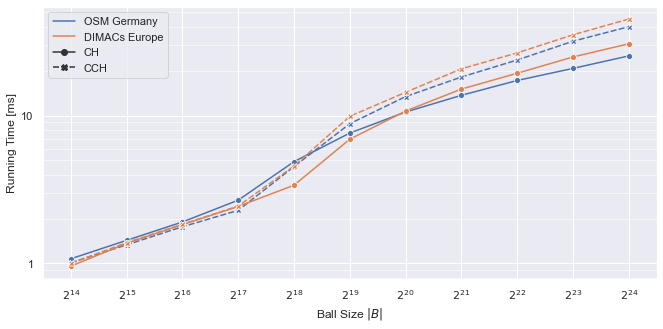

In [33]:
plt.figure(figsize=(11,5))
g = sns.lineplot(data=queries
                 .loc[lambda x: x['algo'] != 'lazy_rphast_many_to_many']
                 .loc[lambda x: x['target_set_size_exp'] == 14]
                 .groupby(['ball_size_exp', 'graph', 'algo'])['running_time_ms'].mean()
                 .reset_index(), x='ball_size_exp', y='running_time_ms', hue='graph', style='algo', markers=True, ci='sd', hue_order=['OSM Germany', 'DIMACs Europe'], style_order=['lazy_rphast_many_to_one', 'lazy_rphast_cch_many_to_one'])
g.set_xlabel('Ball Size $|B|$')
g.set_ylabel('Running Time [ms]')
g.set_yscale('log')
g.yaxis.set_major_formatter(mpl.ticker.LogFormatter())
g.xaxis.set_major_locator(mpl.ticker.MaxNLocator(11))
g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"$2^{{{int(val)}}}$"))
plt.grid(True, which="minor", linewidth=0.6)
handles, labels = g.get_legend_handles_labels()
g.legend(handles[1:3] + handles[4:6], labels[1:3] + ['CH', 'CCH'])

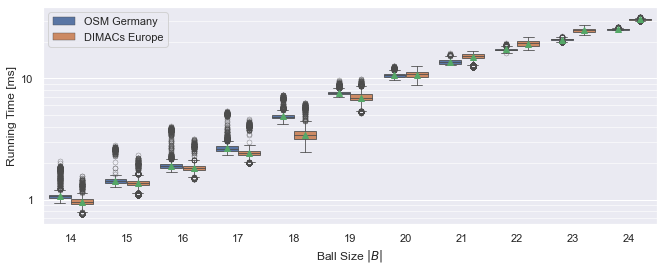

In [21]:
plt.figure(figsize=(11,4))
g = sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_ms', hue='graph', showmeans=True, linewidth=0.8, flierprops=dict(marker='o', markerfacecolor='none', markeredgewidth=0.3))
g.set_xlabel('Ball Size $|B|$')
g.set_ylabel('Running Time [ms]')
g.set_yscale('log')
g.yaxis.set_major_formatter(mpl.ticker.LogFormatter())
plt.grid(True, which="minor", linewidth=0.6)
g.legend().set_title('')

In [10]:
queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 14].loc[lambda x: x['ball_size_exp'] == 21]['running_time_ms'].describe()

count     200.00
mean    3,758.09
std       748.88
min     2,178.02
25%     3,173.52
50%     3,601.14
75%     4,461.53
max     6,565.60
Name: running_time_ms, dtype: float64

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

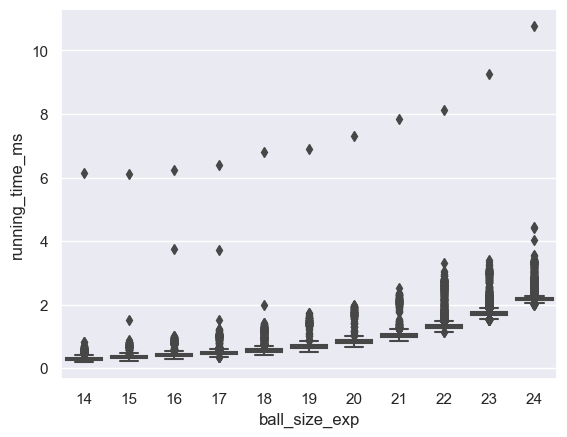

In [25]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 10], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

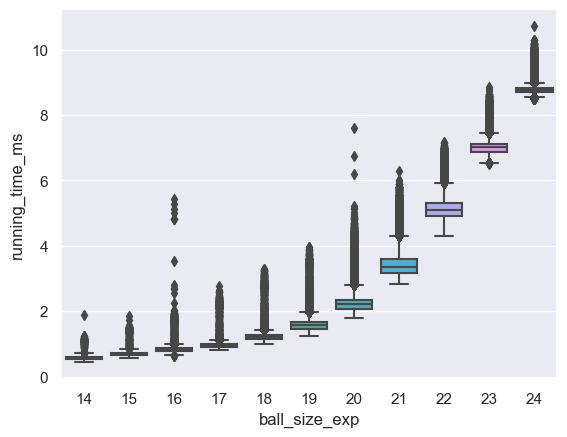

In [23]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 12], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

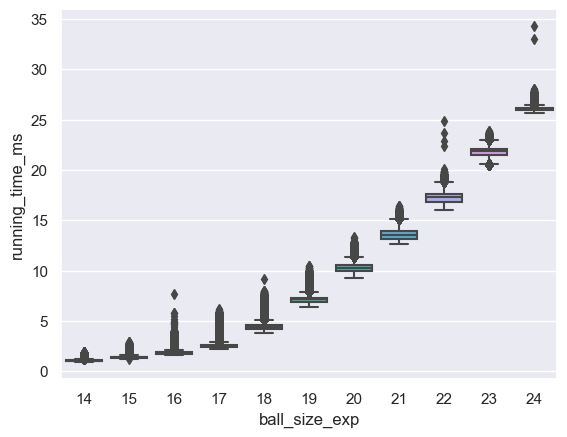

In [24]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_one'].loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_ms')

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

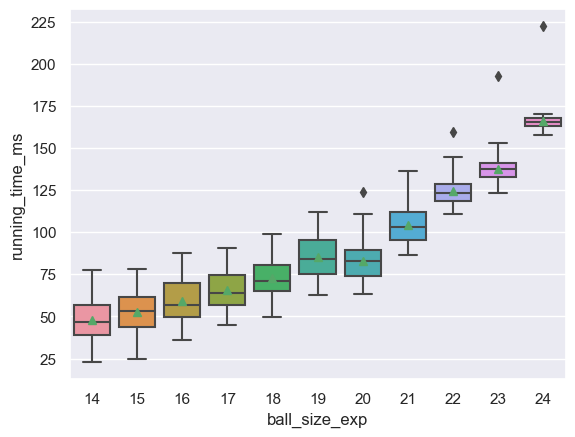

In [19]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 10], x='ball_size_exp', y='running_time_ms', showmeans=True)

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

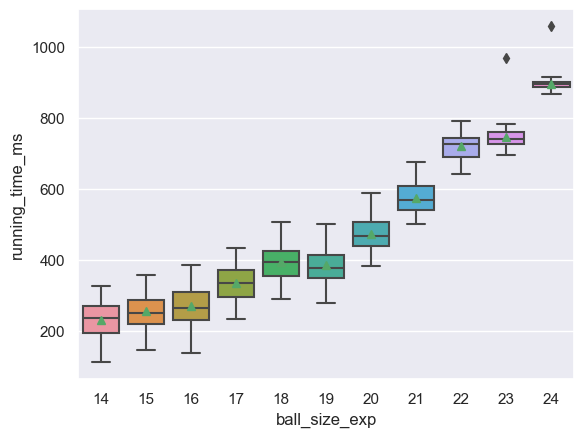

In [20]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 12], x='ball_size_exp', y='running_time_ms', showmeans=True)

<AxesSubplot:xlabel='ball_size_exp', ylabel='running_time_ms'>

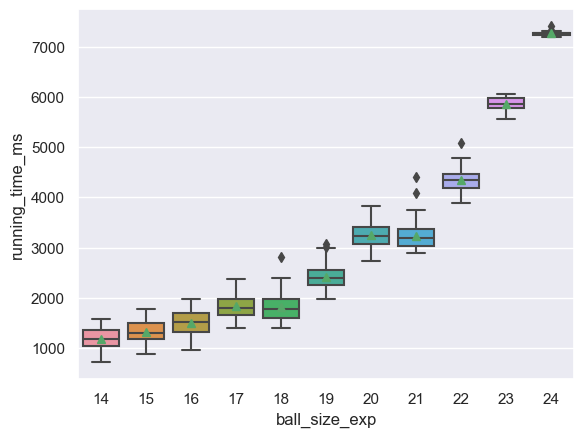

In [21]:
sns.boxplot(data=queries.loc[lambda x: x['algo'] == 'lazy_rphast_many_to_many'].loc[lambda x: x['target_set_size_exp'] == 14], x='ball_size_exp', y='running_time_ms', showmeans=True)